In [1]:
# # pip install numpy and matplotlib
# !pip install numpy
# !pip install matplotlib


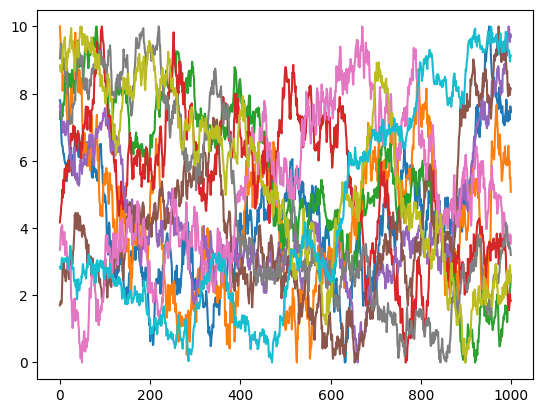

In [2]:
# generate 10 data series with 1000 data points each, between 0 and 1, where each data point's growth is a normally distributed random variable with mean 0 and standard deviation 1
# plot the data series

import numpy as np
import matplotlib.pyplot as plt

# generate 10 data series with 1000 data points each, between 0 and 10, where each data point's
#  growth is a normally distributed random variable with mean 0 and standard deviation 1
data = np.random.normal(0, 1, (10, 1000))
# convert this into data where data is based on the growth rate given above
data = np.cumsum(data, axis=1)

# detrend the data
for i in range(10):
    data[i] = data[i] - np.mean(data[i])

# normalize the data to be between 0 and 10
for i in range(10):
    data[i] = data[i] - np.min(data[i])
    data[i] = data[i] / np.max(data[i])
    data[i] = data[i] * 10

# plot the data series
plt.plot(data.T)
plt.show()


<Axes: >

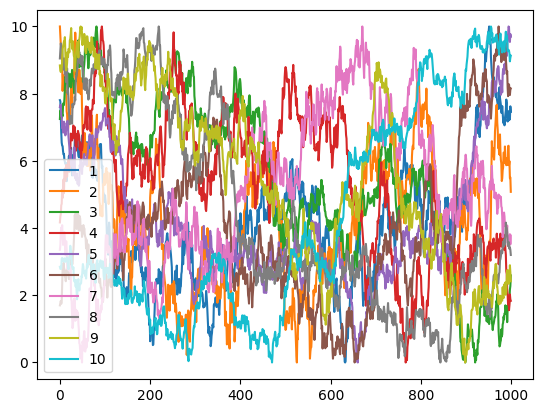

In [3]:
# convert the data into a pandas dataframe with columns "1", "2" and so on
import pandas as pd
df = pd.DataFrame(data.T)
df.columns = [str(i) for i in range(1, 11)]

# plot the data series
df.plot()


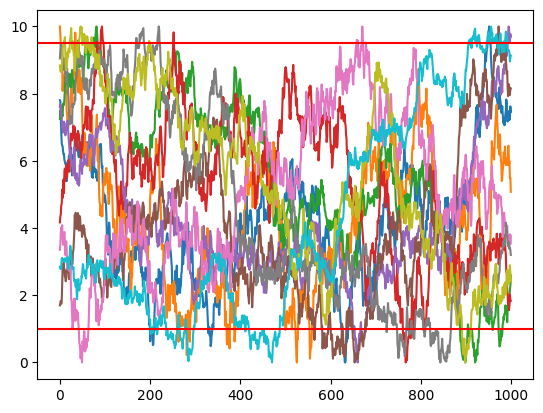

645

In [4]:
def run_predict(alpha_low=0.05, alpha_up=0.95, input_df=df, plot=True):
    # multipy alpha low and alpha up by 10 to get the quantiles
    alpha_low = alpha_low * 10
    alpha_up = alpha_up * 10


    # calculate the number of points that are below alpha_low and above alpha_up
    # for each data series
    count = 0
    for i in range(10):
        count += len(input_df[(input_df[str(i+1)] < alpha_low) | (input_df[str(i+1)] > alpha_up)])
        

    # return the sum of the counts of these runs
    # if plot is True, plot the data series and the quantiles
    # if plot is False, do not plot the data series and the quantiles
    if plot:
        plt.plot(input_df)
        # plot the alpha_low and alpha_up values as horizontal lines
        plt.axhline(alpha_low, color='r')
        plt.axhline(alpha_up, color='r')

        plt.show()
    
    return count

# run the function with alpha_low = 0.05 and alpha_up = 0.95
run_predict(alpha_low=0.1)

In [8]:
# write an optuna code to find the optimal alpha_low and alpha_up values if we want to get the run_predict results to be 100
import optuna

def objective(trial):
    alpha_low = trial.suggest_uniform('alpha_low', 0, 1)
    alpha_up = 1-alpha_low
    return (run_predict(alpha_low=alpha_low, alpha_up=alpha_up, plot=False) - 100)**2


study = optuna.create_study(direction='minimize')

# Modify the early_stopping function
def on_trial_complete(study, trial):
    best_trial = study.best_trial
    if best_trial is not None and best_trial.value < 1:
        study.stop()

study.optimize(objective, n_trials=1000, callbacks=[on_trial_complete])

[I 2023-11-08 13:58:27,048] A new study created in memory with name: no-name-d1ee9e08-66a5-4d95-8520-c27be4983cb1
[I 2023-11-08 13:58:27,057] Trial 0 finished with value: 98010000.0 and parameters: {'alpha_low': 0.7153539352694352}. Best is trial 0 with value: 98010000.0.
[I 2023-11-08 13:58:27,064] Trial 1 finished with value: 98010000.0 and parameters: {'alpha_low': 0.7284695688584052}. Best is trial 0 with value: 98010000.0.
[I 2023-11-08 13:58:27,077] Trial 2 finished with value: 6091024.0 and parameters: {'alpha_low': 0.20085752865357998}. Best is trial 2 with value: 6091024.0.
[I 2023-11-08 13:58:27,085] Trial 3 finished with value: 98010000.0 and parameters: {'alpha_low': 0.7590683312165312}. Best is trial 2 with value: 6091024.0.
[I 2023-11-08 13:58:27,095] Trial 4 finished with value: 98010000.0 and parameters: {'alpha_low': 0.871877113193442}. Best is trial 2 with value: 6091024.0.
[I 2023-11-08 13:58:27,102] Trial 5 finished with value: 98010000.0 and parameters: {'alpha_low

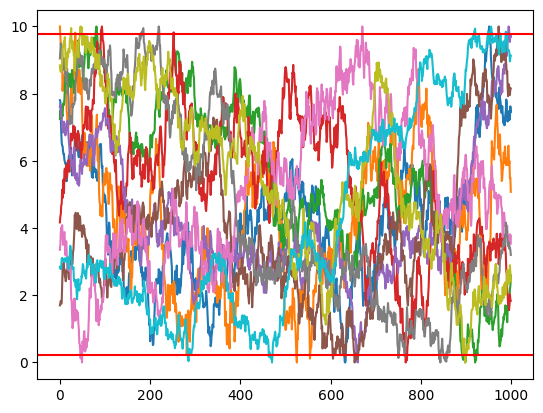

100

In [9]:
# plot the data series and the quantiles for the optimal alpha_low and alpha_up values

run_predict(alpha_low=study.best_params['alpha_low'], alpha_up=1-study.best_params['alpha_low'])
